# Data preprocessing / データの前処理

__scikit-learn__ (`sklearn`) is a Python package which contains a large number of functions for doing machine learning, including data processing and classification.
<br>
It contains many subpackages. In the code below we will import the necessary subpackages when they are needed.

__scikit-learn__（`sklearn`）は、前処理、分類など機械学習を実行するための多数の関数を含むPythonパッケージです。
<br>
多くのサブパッケージが含まれています。以下のコードでは、必要なサブパッケージを適宜にインポートします。

## Iris dataset / アヤメのデータセット

### Observations and labels / 観測とラベル

We use the "iris dataset" with 150 records and five attributes: flower type, sepal length, sepal width, petal length, petal width.

150のサンプルと5つの属性（花の種類、がくの長さ、がくの幅、花びらの長さ、花びらの幅）を持つ「アヤメのデータセット」を使用します。
<br>
<img src="./img/petal-sepal.jpg" width="150">

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
iris = np.genfromtxt('iris_data.csv', delimiter=',')

Each sample is composed of:
- A flower type 0 (iris setosa), 1 (iris versicolor) or 2 (iris virginica) ⇒ labels
- The 4 sepal and petal measurements ⇒ observations

各サンプルは次のもので構成されています。
- 花の種類：0（ヒオウギアヤメ）、1（ブルーフラッグ）または 2（バージニカ） ⇒ ラベル
- 花びらとがくの4つの測定データ ⇒ 観察

In the remainder, we will use the letters `X` for the observations and `y` for the labels.

これ以降は、観測データには文字`X`を使用し、ラベルには`y`を使用します。

In [3]:
X = iris[:,1:]
y = iris[:,0]
print("X has shape:", X.shape)
print("y has shape:", y.shape)

X has shape: (150, 4)
y has shape: (150,)


## Data preparation / データの準備

#### Spliting into training and testing set / トレーニングとテストセットに分割

Most times a classifier is trained in order to correctly predict labels for _new future observations_.
<br>
Consequently, what really matters is the performance of the classifier when presented with new obervations.
<br>
A practical way to measure future performance is to split the available examples in two sets:
- A set that is used for training ⇒ __training set__
- A set that is used for testing the performance ⇒ __testing set__


ほとんどの場合、分類器をトレーニングさせるり用は_新しい将来の観測_のラベルを正しく予測するためです。
<br>
そのため、本当に重要なのは、新しい観測を提示したときの分類器のパフォーマンスです。
<br>
将来のパフォーマンスを測定する実際的な方法は、使用可能な例を2つのセットに分割することです。
- トレーニングに使用されるセット ⇒ __トレーニングセット__
- パフォーマンスのテストに使用されるセット ⇒ __テストセット__

The examples in the testing set are playing the role of the "never seen before" observations.
<br>
Computing the accuracy on the testing set gives us an idea of how well the trained classifier __generalizes__, i.e. how well it classifies observations that are not part of the training set.

テストセットは、「これまでに見たことのない」観測の役割を果たしています。
<br>
テストセットの精度を計算すると、トレーニングされた分類器がどの程度__一般化__するか（つまり、トレーニングセットに入ってない観測をどの程度適切に分類でいるか）がわかります。

First, let us divide the dataset into a __training__ and a __testing__ set.
<br>
The samples will be _randomly_ associated to the training or the testing set.

まず、データセットを__トレーニングセット__と__テストセット__に分割しましょう。
<br>
サンプルは、トレーニングまたはテストセットに_ランダムに_割り当てられます。

_▶ Using sklearn to split data / sklearnを使用したデータの分割_

We use the function `train_test_split` from `sklearn.model_selection` to split the data into training and testing sets.

`sklearn.model_selection`の`train_test_split`関数を使用して、データをトレーニングセットとテストセットに分割できます。

In [4]:
from sklearn.model_selection import train_test_split

# test_size=0.3 ⇒ 30％ of data in test set, the rest (70%) in training set
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 105
Testing set size: 45


Let's check how many flowers of each species are in the training set and the testing set.

トレーニングセットとテストセットに含まれる各種の花の数を確認してみましょう。

In [5]:
print("training set:")
print("Iris setosa:", np.sum(y_train == 0))
print("Iris versicolor:", np.sum(y_train == 1))
print("Iris virginica:", np.sum(y_train == 2))

training set:
Iris setosa: 32
Iris versicolor: 38
Iris virginica: 35


In [6]:
print("testing set:")
print("Iris setosa:", np.sum(y_test == 0))
print("Iris versicolor:", np.sum(y_test == 1))
print("Iris virginica:", np.sum(y_test == 2))

testing set:
Iris setosa: 18
Iris versicolor: 12
Iris virginica: 15


_▶ Manually splitting data / 手動のデータ分割 (optional)_

For reference, here is the code for splitting the data manually. It does the same thing as `train_test_split`.
<br>
(If you want to run the code, first transform the cell into a code cell.)

参考までに、データを手動で分割するコードを次に示します。`train_test_split`と同じことを行います。
<br>
（コードを実行したい場合は、まずセルをコードセルに変換してください。）

#### Data standardization / データの標準化

The goal of standardization is to transform the features so that they have zero mean and unit variance. This is important to do to prevent that some features have larger influence on the result than others. 

標準化の目的は、平均と単位分散がゼロになるように特徴を変換することです。これは、一部の特徴が他の特徴よりも結果に大きな影響を与えることを防ぐために行うことが重要です。

The package `sklearn.preprocessing` provides a `StandardScaler` that computes the scaling parameters from a training set and makes it possible to easily apply these parameters to new data. This is the function we will usually use for scaling.

パッケージ`sklearn.preprocessing`は、トレーニングセットからスケーリングパラメーターを計算し、これらのパラメーターを新しいデータに適用できるようにする`StandardScaler`を提供します。標準化を行うために使用します。

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

First, the parameters of the `StandardScaler` have to be computed from the training set. This is done with the method `fit`.

まず、`StandardScaler`のパラメーターをトレーニングセットから計算する必要があります。これはメソッド`fit`で行われます。

In [8]:
scaler.fit(X_train);

Then, we can create a scaled training set using the method `transform`.

次に、`transform`メソッドを使用して、スケーリングされたトレーニングセットを作成できます。

In [9]:
X_train_raw = X_train # We keep a copy of the original training set for plotting
X_train = scaler.transform(X_train_raw)

Let's plot the scaled data to see how it looks like.

プロットして、スケーリングされたデータがどのように見えるか見てみましょう。

Text(0.5, 0, 'samples')

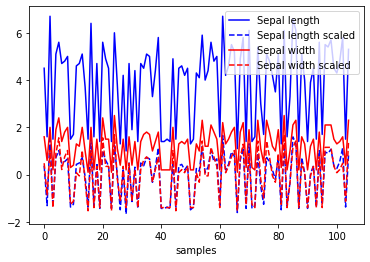

In [10]:
plt.plot(X_train_raw[:,2], 'b-', label="Sepal length")
plt.plot(X_train[:,2], 'b--', label="Sepal length scaled")
plt.plot(X_train_raw[:,3], 'r-', label="Sepal width")
plt.plot(X_train[:,3], 'r--', label="Sepal width scaled")
plt.legend()
plt.xlabel("samples")

We need to scale also the observations in the test set.

テストセットの観測値もスケーリングする必要があります。

In [11]:
X_test_raw = X_test
X_test = scaler.transform(X_test_raw)

> IMPORTANT: Fit the scaler to the _training data only_, not to the full dataset (including the test set). Only then use it to transform both the training set and the test set.

>重要：fit関数は全部のデータセットではなく、__トレーニングデータのみ__に適合させます。それを使用してトレーニングセットとテストセットの両方を変換します。

## Try  it yourself ! / 自分で試そう！

[Click here](session4-playground.ipynb) to open a sample notebook and try doing data processing

[ここをクリックして](session4-playground.ipynb)、サンプルのノートブックを開き、データ処理を行ってみてください

---